In [258]:
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')

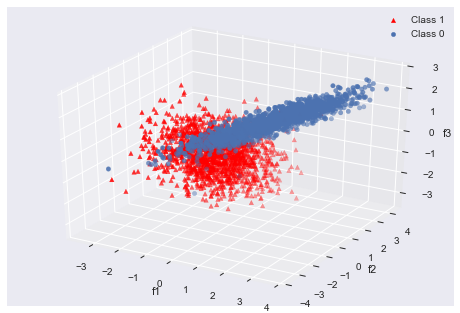

In [259]:
dfx=pd.read_csv('Logistic_X_Train.csv')
dfy=pd.read_csv('Logistic_Y_Train.csv')
df=pd.concat([dfx,dfy],axis=1)
class1=df[(df['label']==1)]
class0=df[(df['label']==0)]
class1_x1=class1['f1'].values
class1_x2=class1['f2'].values
class1_x3=class1['f3'].values
class0_x1=class0['f1'].values
class0_x2=class0['f2'].values
class0_x3=class0['f3'].values
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('f3')
ax.scatter(class1_x1,class1_x2,class1_x3,color='r',marker='^',label='Class 1')
ax.scatter(class0_x1,class0_x2,class0_x3,label='Class 0')
ax.legend()

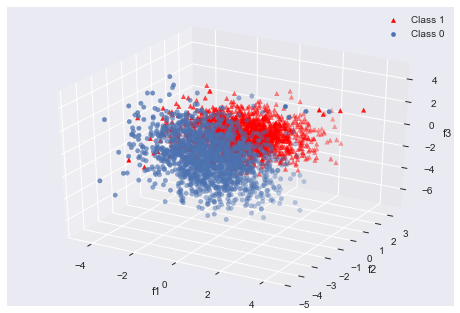

In [260]:
class1_x1=(class1_x1-class1_x1.mean())/class1_x1.std()
class1_x2=(class1_x2-class1_x2.mean())/class1_x2.std()
class1_x3=(class1_x3-class1_x3.mean())/class1_x3.std()
class0_x1=(class1_x1-class0_x1.mean())/class0_x1.std()
class0_x2=(class1_x2-class0_x2.mean())/class0_x2.std()
class0_x3=(class1_x3-class0_x3.mean())/class0_x3.std()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('f3')
ax.scatter(class1_x1,class1_x2,class1_x3,color='r',marker='^',label='Class 1')
ax.scatter(class0_x1,class0_x2,class0_x3,label='Class 0')
ax.legend()

In [261]:
#print(df)
data=df.values
print(data)
X_train=data[:,:-1]
Y_train=data[:,-1]
print(X_train.shape,Y_train.shape)

[[-1.23937466  0.74910149 -0.52851491  1.        ]
 [-1.03607028  0.80143631 -1.28371152  1.        ]
 [-0.61557914  1.57952053 -1.39192706  1.        ]
 ...
 [ 0.08827657  1.63878904 -2.19364056  1.        ]
 [ 1.52515501  0.85923429  1.50530791  0.        ]
 [-0.97981744  0.56395376 -1.53939416  1.        ]]
(3000, 3) (3000,)


In [262]:
def hypothesis(x,w,b):
    '''accepts input vector x, input weight vector w and bias b'''
    hx = np.dot(x,w)+b
    return sigmoid(hx)

In [263]:
def sigmoid(h):
    return 1.0/(1.0 + np.exp(-1.0*h))

In [264]:
def error(y,x,w,b):
    m = x.shape[0]
    err = 0.0
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        err += y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
    return err/m

In [265]:
def get_grad(x,w,b,y):
    grad_b = 0.0
    grad_w = np.zeros(w.shape)
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        grad_w += (y[i] - hx)*x[i]
        grad_b +=  (y[i]-hx)
    
    grad_w /=m
    grad_b /=m
    return [grad_w,grad_b]

In [266]:
def gradient_descent(x,y,w,b,learning_rate=0.005):
    err = error(y,x,w,b)
    [grad_w,grad_b] = get_grad(x,w,b,y)
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    return err,w,b

In [267]:
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

In [268]:
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [269]:
loss = []
acc = []

W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [270]:
dftest=pd.read_csv('Logistic_X_Test.csv')
X_test=dftest.values
Y_test=[]
m = X_test.shape[0]
for i in range(m):
    confidence = hypothesis(X_test[i],W,b)
    if confidence<0.5:
        Y_test.append(0)
    else:
        Y_test.append(1)
X_test=np.array(X_test)
Y_test=np.array(Y_test)
print(X_test.shape)
print(Y_test.shape)
print(X_test)
print(Y_test)
for i in range(1000):
    l,W,b = gradient_descent(X_train,Y_train,W,b,learning_rate=0.1)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

(1000, 3)
(1000,)
[[-0.76750773 -0.2618595  -2.51483147]
 [-1.24165258  1.44900144 -0.4130893 ]
 [ 1.92527007  1.93176097  1.34261917]
 ...
 [-1.18696873  0.94734729 -0.78638597]
 [-0.53232395  1.84516978 -0.9935503 ]
 [ 0.54023217  0.58099406  0.38664901]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

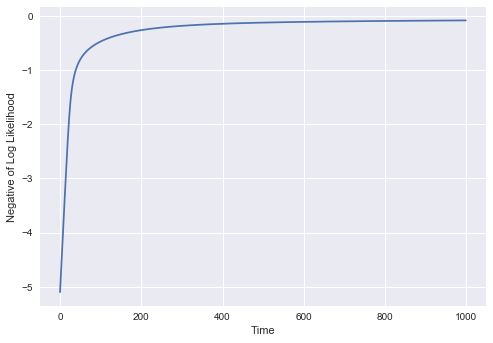

In [271]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

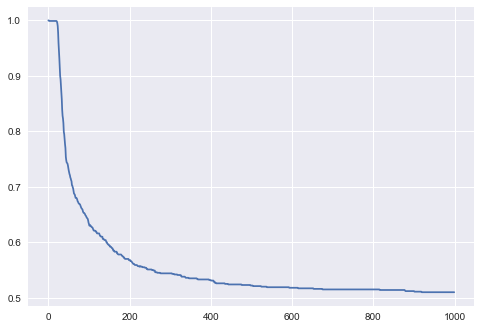

0.51


In [272]:
plt.plot(acc)
plt.show()
print(acc[-1])

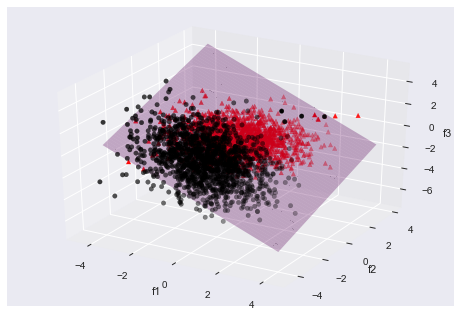

In [273]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('f3')
ax.scatter(class1_x1,class1_x2,class1_x3,color='r',marker='^',label='Class 1')
ax.scatter(class0_x1,class0_x2,class0_x3,color='k',label='Class 0')

tmp = np.linspace(-4,4,50)
x,y = np.meshgrid(tmp,tmp)

X,Y = np.meshgrid(x,y)

Z = -(W[0]*X + W[1]*Y + b)/W[2]

surf = ax.plot_surface(X,Y,Z,color='purple',alpha=0.3)

In [274]:
print(W)
print(b)

[-2.07225992  1.33983783 -2.55361074]
-1.421773003004013
